In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('/home/cc/DigiEV/rawData/20240530_20250530_recharge_detail_records.xlsx')
df = df.iloc[:, 1:] # 读取后删除第一列
df = df[df['location_name'] == 'PS 030-1 - IPP - Drahi - X']
df.head() 

,transaction_id,id_ocpp,location_name,id_pl,start_volume,end_volume,total_volume,startdate,enddate,duration,authorize,rfid,book_id,auth_method
0,512840826,ParisSaclay30-1,PS 030-1 - IPP - Drahi - X,1,2275.265,2293.518,18.253,2025-05-30T12:04:57Z,2025-05-30T13:38:43Z,5626,RemoteApp,1,NaN,RFID
1,703497342,ParisSaclay30-1,PS 030-1 - IPP - Drahi - X,1,2274.677,2275.181,0.504,2025-05-30T05:42:28Z,2025-05-30T05:44:44Z,136,8E47015B,8E47015B,NaN,RFID
2,412512340,ParisSaclay30-1,PS 030-1 - IPP - Drahi - X,1,2272.276,2274.677,2.401,2025-05-29T22:34:44Z,2025-05-29T22:45:24Z,640,8E47015B,8E47015B,NaN,RFID
5,852888750,ParisSaclay30-1,PS 030-1 - IPP - Drahi - X,1,2264.202,2272.276,8.074,2025-05-29T10:38:30Z,2025-05-29T11:27:56Z,2966,8E47015B,8E47015B,NaN,RFID
7,718583992,ParisSaclay30-1,PS 030-1 - IPP - Drahi - X,1,2263.346,2264.202,0.856,2025-05-28T17:00:49Z,2025-05-29T06:05:31Z,47082,8E47015B,8E47015B,NaN,RFID


In [4]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
Index: 110 entries, 0 to 929
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  110 non-null    int64  
 1   id_ocpp         110 non-null    object 
 2   location_name   110 non-null    object 
 3   id_pl           110 non-null    int64  
 4   start_volume    110 non-null    float64
 5   end_volume      110 non-null    float64
 6   total_volume    110 non-null    float64
 7   startdate       110 non-null    object 
 8   enddate         110 non-null    object 
 9   duration        110 non-null    int64  
 10  authorize       110 non-null    object 
 11  rfid            110 non-null    object 
 12  book_id         0 non-null      float64
 13  auth_method     110 non-null    object 
dtypes: float64(4), int64(3), object(7)
memory usage: 12.9+ KB


In [5]:
df.describe()      

,transaction_id,id_pl,start_volume,end_volume,total_volume,duration,book_id
count,1.100000e+02,110.0,110.000000,110.000000,110.000000,110.000000,0.0
mean,4.677271e+08,1.0,1753.966779,1762.675162,8.708383,51197.190909,NaN
std,2.861374e+08,0.0,336.507367,337.653642,7.116821,86809.348806,NaN
min,1.786598e+06,1.0,1.315738,1.316818,0.001080,1.000000,NaN
25%,2.328576e+08,1.0,1495.875000,1506.534250,2.392750,2412.250000,NaN
50%,4.279620e+08,1.0,1738.750000,1742.419000,7.271000,9180.000000,NaN
75%,7.094887e+08,1.0,2030.576750,2042.444750,13.760250,64656.500000,NaN
max,9.999882e+08,1.0,2275.265000,2293.518000,30.577000,427906.000000,NaN


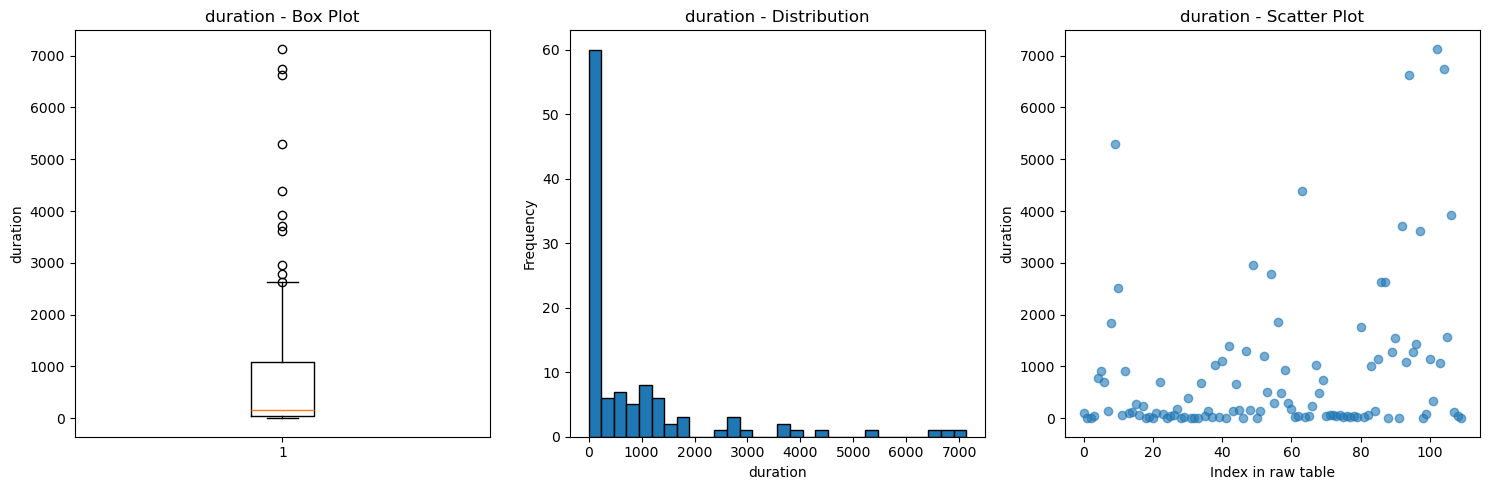

In [6]:
column_name = 'duration'
df[column_name] = df[column_name] / 60

# Visualize the data first
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(df[column_name].dropna())
plt.title(f'{column_name} - Box Plot')
plt.ylabel(column_name)

plt.subplot(1, 3, 2)
plt.hist(df[column_name].dropna(), bins=30, edgecolor='black')
plt.title(f'{column_name} - Distribution')
plt.xlabel(column_name)
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.scatter(range(len(df)), df[column_name], alpha=0.6)
plt.title(f'{column_name} - Scatter Plot')
plt.xlabel('Index in raw table')
plt.ylabel(column_name)

plt.tight_layout()
plt.show()

In [7]:
# Remove outliers using IQR method
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nOutlier detection:")
print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Normal range: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Find outliers
outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
print(f"Outliers found: {outliers.sum()}")

# Remove outliers
df_clean = df[~outliers]
print(f"Data after removing outliers: {len(df_clean)} rows")
print(f"Removed {len(df) - len(df_clean)} rows ({(len(df) - len(df_clean))/len(df)*100:.1f}%)")

# Show statistics after cleaning
print(f"\nAfter cleaning:")
print(df_clean[column_name].describe())



Outlier detection:
Q1: 40.20
Q3: 1077.61
IQR: 1037.40
Normal range: [-1515.90, 2633.71]
Outliers found: 11
Data after removing outliers: 99 rows
Removed 11 rows (10.0%)

After cleaning:
count      99.000000
mean      444.799327
std       600.409386
min         0.016667
25%        28.383333
50%       125.083333
75%       765.708333
max      2630.916667
Name: duration, dtype: float64


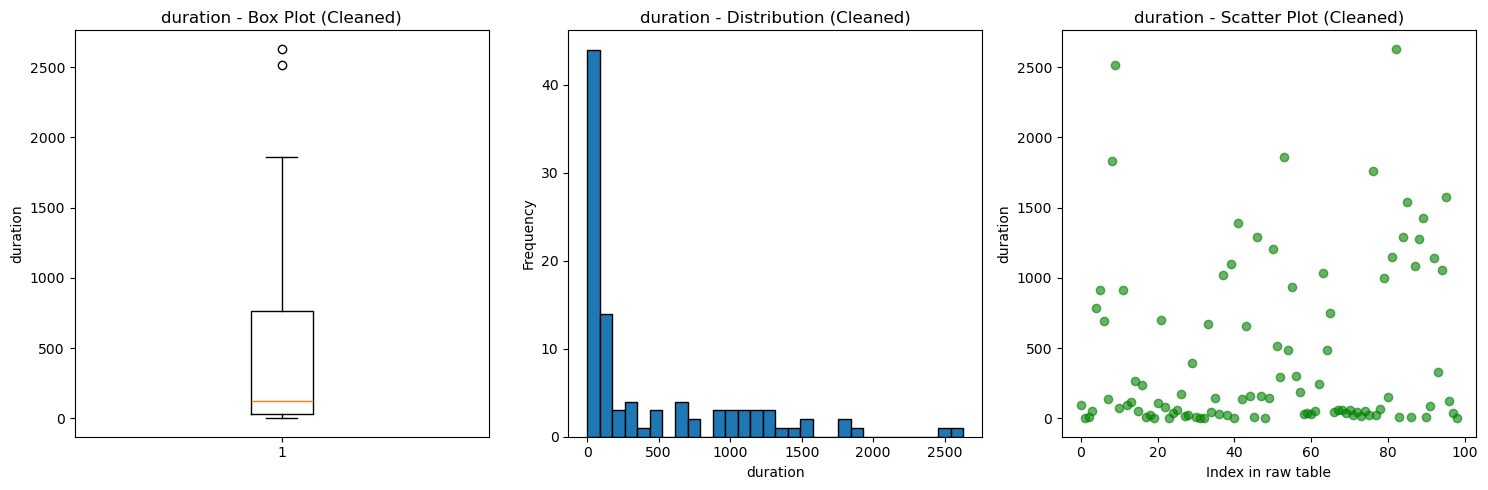

In [8]:

# Visualize cleaned data
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(df_clean[column_name].dropna())
plt.title(f'{column_name} - Box Plot (Cleaned)')
plt.ylabel(column_name)

plt.subplot(1, 3, 2)
plt.hist(df_clean[column_name].dropna(), bins=30, edgecolor='black')
plt.title(f'{column_name} - Distribution (Cleaned)')
plt.xlabel(column_name)
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.scatter(range(len(df_clean)), df_clean[column_name], alpha=0.6, color='green')
plt.title(f'{column_name} - Scatter Plot (Cleaned)')
plt.xlabel('Index in raw table')
plt.ylabel(column_name)

plt.tight_layout()
plt.show()


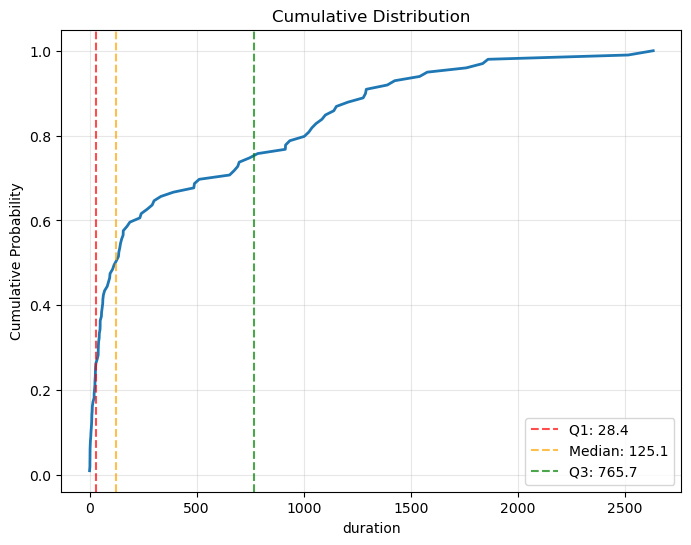

In [9]:
data_sorted = df_clean[column_name].dropna().sort_values()

plt.figure(figsize=(8, 6))
x = np.sort(data_sorted)
y = np.arange(1, len(x) + 1) / len(x)
plt.plot(x, y, linewidth=2)
plt.title('Cumulative Distribution')
plt.xlabel(column_name)
plt.ylabel('Cumulative Probability')
plt.grid(True, alpha=0.3)

# Add quartile lines
q25, q50, q75 = np.percentile(data_sorted, [25, 50, 75])
plt.axvline(q25, color='red', linestyle='--', alpha=0.7, label=f'Q1: {q25:.1f}')
plt.axvline(q50, color='orange', linestyle='--', alpha=0.7, label=f'Median: {q50:.1f}')
plt.axvline(q75, color='green', linestyle='--', alpha=0.7, label=f'Q3: {q75:.1f}')
plt.legend()
plt.show()

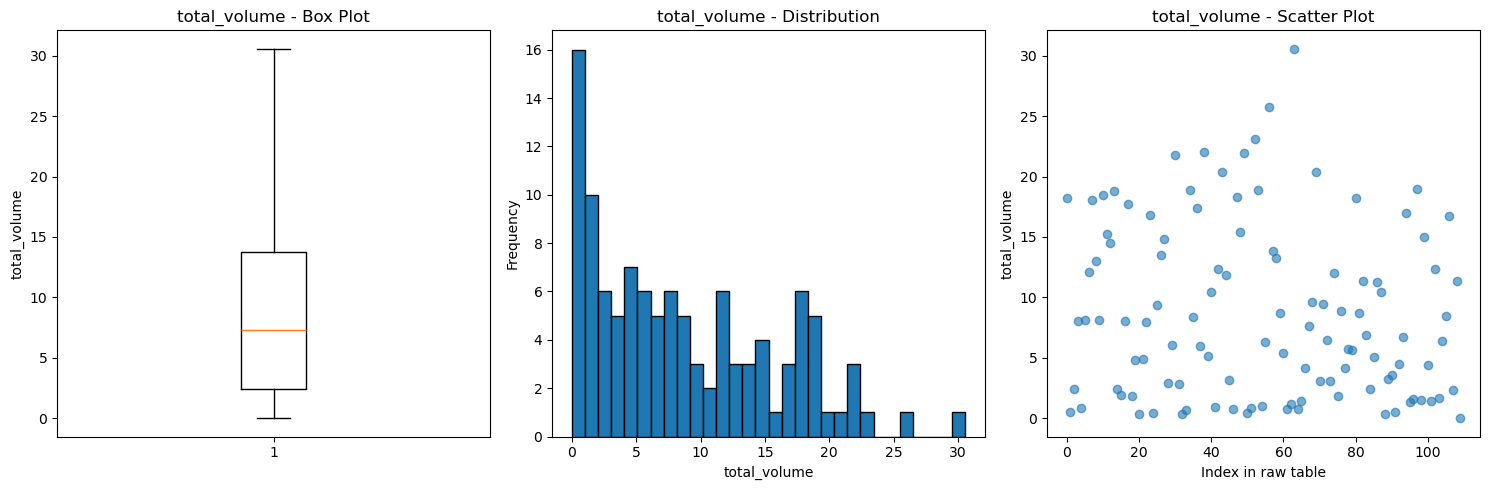

In [10]:
column_name = 'total_volume'

# Visualize the data first
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(df[column_name].dropna())
plt.title(f'{column_name} - Box Plot')
plt.ylabel(column_name)

plt.subplot(1, 3, 2)
plt.hist(df[column_name].dropna(), bins=30, edgecolor='black')
plt.title(f'{column_name} - Distribution')
plt.xlabel(column_name)
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.scatter(range(len(df)), df[column_name], alpha=0.6)
plt.title(f'{column_name} - Scatter Plot')
plt.xlabel('Index in raw table')
plt.ylabel(column_name)

plt.tight_layout()
plt.show()

In [11]:

# Remove outliers using IQR method
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nOutlier detection:")
print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Normal range: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Find outliers
outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
print(f"Outliers found: {outliers.sum()}")

# Remove outliers
df_clean = df[~outliers]
print(f"Data after removing outliers: {len(df_clean)} rows")
print(f"Removed {len(df) - len(df_clean)} rows ({(len(df) - len(df_clean))/len(df)*100:.1f}%)")

# Show statistics after cleaning
print(f"\nAfter cleaning:")
print(df_clean[column_name].describe())



Outlier detection:
Q1: 2.39
Q3: 13.76
IQR: 11.37
Normal range: [-14.66, 30.81]
Outliers found: 0
Data after removing outliers: 110 rows
Removed 0 rows (0.0%)

After cleaning:
count    110.000000
mean       8.708383
std        7.116821
min        0.001080
25%        2.392750
50%        7.271000
75%       13.760250
max       30.577000
Name: total_volume, dtype: float64


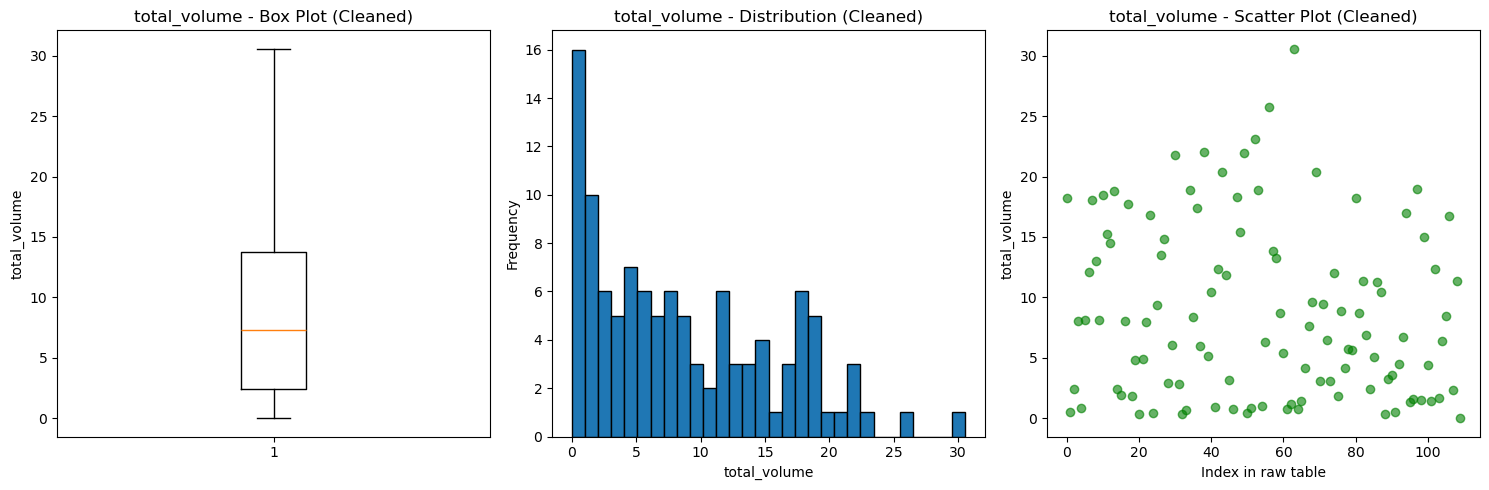

In [12]:
# Visualize cleaned data
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(df_clean[column_name].dropna())
plt.title(f'{column_name} - Box Plot (Cleaned)')
plt.ylabel(column_name)

plt.subplot(1, 3, 2)
plt.hist(df_clean[column_name].dropna(), bins=30, edgecolor='black')
plt.title(f'{column_name} - Distribution (Cleaned)')
plt.xlabel(column_name)
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.scatter(range(len(df_clean)), df_clean[column_name], alpha=0.6, color='green')
plt.title(f'{column_name} - Scatter Plot (Cleaned)')
plt.xlabel('Index in raw table')
plt.ylabel(column_name)

plt.tight_layout()
plt.show()


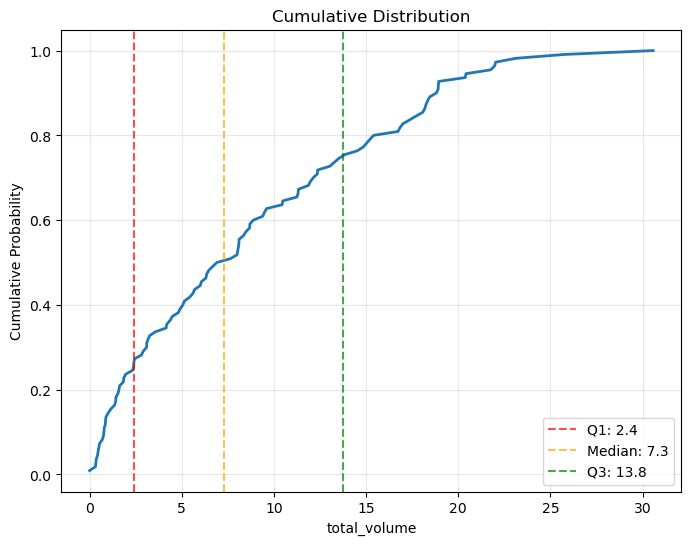

In [13]:
data_sorted = df_clean[column_name].dropna().sort_values()

plt.figure(figsize=(8, 6))
x = np.sort(data_sorted)
y = np.arange(1, len(x) + 1) / len(x)
plt.plot(x, y, linewidth=2)
plt.title('Cumulative Distribution')
plt.xlabel(column_name)
plt.ylabel('Cumulative Probability')
plt.grid(True, alpha=0.3)

# Add quartile lines
q25, q50, q75 = np.percentile(data_sorted, [25, 50, 75])
plt.axvline(q25, color='red', linestyle='--', alpha=0.7, label=f'Q1: {q25:.1f}')
plt.axvline(q50, color='orange', linestyle='--', alpha=0.7, label=f'Median: {q50:.1f}')
plt.axvline(q75, color='green', linestyle='--', alpha=0.7, label=f'Q3: {q75:.1f}')
plt.legend()
plt.show()